# NLP Sentiment Classification Project

## Data Loading and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('yelp.csv')

### Display the first 10 rows of the dataset

In [2]:
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


### Print out the dataset columns

In [3]:
print(df.columns)

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


### Provide a summary of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Plot a histogram to check the reviews' text length

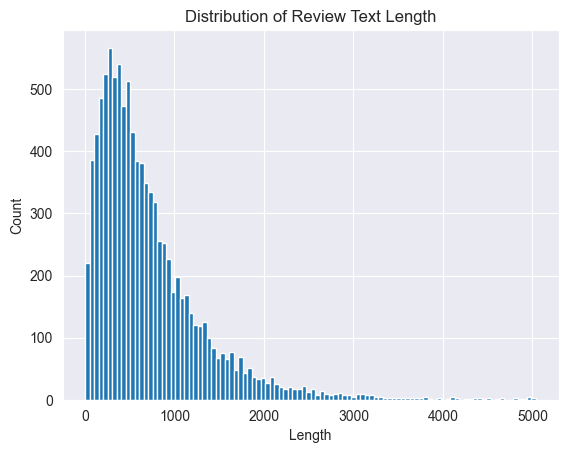

In [5]:
from matplotlib import pyplot as plt
df.text.str.len().hist(bins=100)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Review Text Length")
plt.show()

### Display random review ratings and their text representation.

In [6]:
N = 200
print("Sample review rating:", df.iloc[N].stars)
print("Sample review text:", df.iloc[N].text)

Sample review rating: 5
Sample review text: Who dosen't like Cosco, I love this place. The pizza is cheap and good.


### Analyze the distribution of reviews across different rating categories using visualizations

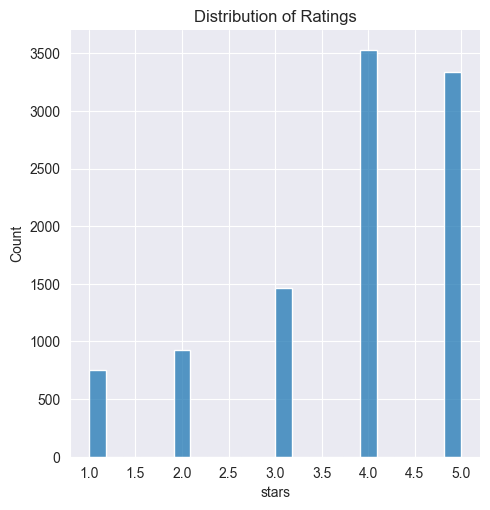

In [7]:
import seaborn as sns
sns.displot(df["stars"])
plt.title("Distribution of Ratings")
plt.show()

### Data Preprocessing

In [8]:
df = pd.read_csv('yelp.csv')

### Map 1-star reviews to represent negative sentiment (0) and 5-star reviews to represent positive sentiment (1).

In [9]:
df = df[(df["stars"] == 1) | (df["stars"] == 5)]
df["label"] = df["stars"].map({1: 0, 5: 1})

X_Data = df["text"]
Y_Data = df["label"]

## Convert text data into numerical representations using the sentence transformer model

In [10]:
from typing import List 
import sentence_transformers
from sentence_transformers import SentenceTransformer
sentence_transformer = SentenceTransformer("all-MiniLM-L6-v2")


def get_text_embeddings(encoder, text: List[str]) -> List[np.ndarray]:
    return encoder.encode(text)

C:\python\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
texts = df.text.tolist()

In [12]:
embeddings = get_text_embeddings(sentence_transformer, texts)

### Check the shape, embedding length, and norm of the numerical representations

In [13]:
embeddings.shape

(4086, 384)

In [14]:
len(embeddings[0])

384

In [15]:
np.linalg.norm(embeddings[0])

0.99999994

In [16]:
df = df.assign(embeddings = [e for e in embeddings])

### Store the sentence embedding DataFrame in feather format for efficient data handling

In [17]:
df.reset_index(inplace=True)
df.to_feather("yelp_with_embeddings.bin")

## Neural Network Model

In [18]:
import torch
import torch.nn as nn

class SentimentClassifier(nn.Module):
    def __init__(self, input_dim=384, hidden_dim1=128, hidden_dim2=64,  output_dim=1):
        super(SentimentClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.BatchNorm1d(hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.BatchNorm1d(hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [19]:
df = pd.read_feather("yelp_with_embeddings.bin")

### Use numerical representations of text reviews for model input

In [20]:
df.embeddings[0]

array([-2.69870870e-02,  1.21111218e-02,  1.03444263e-01,  5.85587248e-02,
       -6.46284223e-02, -1.29983127e-02, -6.94513842e-02, -4.23906259e-02,
       -4.72875647e-02, -7.47565776e-02,  2.75893311e-04, -1.09934276e-02,
       -2.56671179e-02, -6.28251210e-02, -1.99138708e-02, -7.65453056e-02,
        1.74198315e-01, -1.34243011e-01, -1.75687019e-02, -4.12424356e-02,
       -1.09441169e-01, -4.82605211e-02,  4.82458770e-02, -1.33555774e-02,
        5.59582375e-02,  5.01586609e-02,  2.06091125e-02,  4.79414314e-02,
       -4.90631424e-02, -4.00309227e-02, -2.74517313e-02,  6.48624748e-02,
       -4.05024402e-02, -4.38724458e-03, -2.46323515e-02,  4.45185751e-02,
        9.24157351e-02, -1.14275217e-01,  5.28180040e-02, -3.53384792e-04,
        2.43185665e-02, -4.42525595e-02,  5.36391996e-02, -2.23462954e-02,
        2.35288702e-02,  4.34743753e-03, -1.30336974e-02,  4.99515906e-02,
       -1.54166203e-02, -6.97716419e-03, -2.35754829e-02,  2.09900853e-03,
        3.75692360e-02, -

In [21]:
df.embeddings[0].shape

(384,)

In [22]:
df.shape

(4086, 13)

### Split data into training, validation, and tests sets

In [23]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

## Model Training and Validation

In [24]:
from torchmetrics import Accuracy
from tqdm.notebook import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import f1_score
from torch.optim import AdamW
from torch.nn import BCEWithLogitsLoss
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn.utils as nn_utils

# Setup    
writer = SummaryWriter() # Records all details during the training of a model which can be visualized with tensorboard
model = SentimentClassifier() # Neural Network Feedforward Model
loss_function = BCEWithLogitsLoss() # Loss function that combines a Sigmoid layer and Binary Cross Entropy Loss in one single class
optimizer = AdamW(model.parameters(), lr=0.0001, weight_decay=0.001) # Adam optimizer with weight decay regularization, AdamW adds L2 penalty paramater
scheduler = CosineAnnealingLR(optimizer, T_max=40) # Learning rate scheduler with high learning rate and decreases it in a cosine pattern until it reaches close to zero at the end of training


batch_size = 64 # Specifies the number of training examples in one forward/backward pass
num_epochs = 40 # Defines the number times that the learning algorithm will work through the entire training dataset
losses = [] # List to store the loss values during the training process


# Training and Validation Loop
for epoch in range(num_epochs): # Starts a loop that will iterate for a specified number of training epochs. 
    model.train()  # Set the model to training mode
    for i in range(0, len(train_df), batch_size): # Starts a loop over the training dataset in batches, where the size of each batch is batch_size
         # Extract the features (batch_x) and the labels (batch_y) for the current batch from the training data frame
        batch_x = np.array(train_df.embeddings[i:i + batch_size].tolist())
        batch_y = np.array(train_df.label[i:i + batch_size].tolist())
          # Convert the batches of features and labels into tensors
        tensor_batch_x = torch.Tensor(batch_x)
        tensor_batch_y = torch.Tensor(batch_y).reshape(-1, 1)  
        
        optimizer.zero_grad() # Clear the gradients to prevent gradient accumulation
        predictions = model(tensor_batch_x) # Forward pass of the tensor batch x input 
        loss = loss_function(predictions, tensor_batch_y) # Output is compared with truth labels using loss function
        loss.backward()  # Backward pass to compute gradients from the loss. Updates the gradients of model parameters
        nn_utils.clip_grad_value_(model.parameters(), 1.0) # Gradient clipping which prevents the gradients from exploding
        optimizer.step() # Optimization step that updates the weights of the neural network model
        scheduler.step() # Steps the learning rate scheduler
        losses.append(loss.item()) # Loss value is converted to numbers from a Tensor object and appends to the losses list
        # Logs the loss value to a tensorboard
        writer.add_scalar('Loss/train', loss.item(), epoch * len(train_df) + i)

    # Validation
    model.eval()  # Set the model to evaluation mode
    accuracy_metric = Accuracy(task='binary')
    
    # Initialize three lists to store the true labels, the predicted labels, and the predicted probabilities
    y_true = []
    y_pred = []
    y_pred_prob = []

    with torch.no_grad(): # Ensures that gradient computation is deactivated
        for _, eval_row in tqdm(val_df.iterrows(), desc='Evaluating', total=len(val_df)): # creates a progress bar for the evaluation of the model on validation dataset
             # Extract the embeddings and label from each row of the dataframe, and feed the embeddings into the model to make a prediction
            embeddings = torch.Tensor(np.array(eval_row.embeddings)).unsqueeze(0)
            label = torch.Tensor([eval_row.label]).reshape(-1, 1)
            prediction = model(embeddings).reshape(-1)
             # Appends the true label, processed prediction, and raw prediction to their respective lists
            y_true.append(eval_row.label)
            y_pred.append(int(prediction >= 0.5))
            y_pred_prob.append(prediction.item())  
            # Update the accuracy metric with the current prediction and label
            accuracy_metric.update(prediction, label.reshape(-1))

    accuracy_value = accuracy_metric.compute().item()
    f1_value = f1_score(y_true, y_pred)
    
    writer.add_scalar('Accuracy/eval', accuracy_value, epoch)
    writer.add_scalar('F1/eval', f1_value, epoch)

    print(f"Epoch {epoch + 1}/{num_epochs} - Validation F1 Score: {f1_value:.2f}, Accuracy: {accuracy_value:.2f}")

Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 1/40 - Validation F1 Score: 0.01, Accuracy: 0.20


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 2/40 - Validation F1 Score: 0.82, Accuracy: 0.75


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 3/40 - Validation F1 Score: 0.84, Accuracy: 0.78


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 4/40 - Validation F1 Score: 0.87, Accuracy: 0.82


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 5/40 - Validation F1 Score: 0.88, Accuracy: 0.83


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 6/40 - Validation F1 Score: 0.90, Accuracy: 0.85


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 7/40 - Validation F1 Score: 0.90, Accuracy: 0.86


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 8/40 - Validation F1 Score: 0.91, Accuracy: 0.87


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 9/40 - Validation F1 Score: 0.92, Accuracy: 0.88


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 10/40 - Validation F1 Score: 0.93, Accuracy: 0.89


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 11/40 - Validation F1 Score: 0.93, Accuracy: 0.90


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 12/40 - Validation F1 Score: 0.93, Accuracy: 0.90


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 13/40 - Validation F1 Score: 0.93, Accuracy: 0.90


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 14/40 - Validation F1 Score: 0.94, Accuracy: 0.90


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 15/40 - Validation F1 Score: 0.94, Accuracy: 0.91


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 16/40 - Validation F1 Score: 0.95, Accuracy: 0.92


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 17/40 - Validation F1 Score: 0.95, Accuracy: 0.92


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 18/40 - Validation F1 Score: 0.95, Accuracy: 0.93


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 19/40 - Validation F1 Score: 0.95, Accuracy: 0.93


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 20/40 - Validation F1 Score: 0.96, Accuracy: 0.93


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 21/40 - Validation F1 Score: 0.96, Accuracy: 0.93


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 22/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 23/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 24/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 25/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 26/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 27/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 28/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 29/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 30/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 31/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 32/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 33/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 34/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 35/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 36/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 37/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 38/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 39/40 - Validation F1 Score: 0.96, Accuracy: 0.94


Evaluating:   0%|          | 0/654 [00:00<?, ?it/s]

Epoch 40/40 - Validation F1 Score: 0.96, Accuracy: 0.94


### Confusion Matrix using Heatmap function

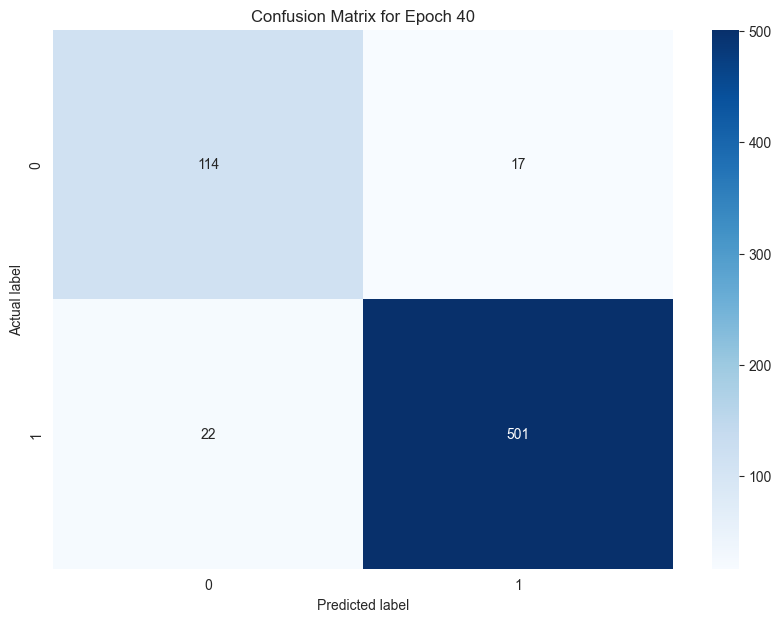

In [25]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix for Epoch {epoch + 1}')
plt.show()

### Save the weights and biases of the model into a binary file 

In [26]:
torch.save(model.state_dict(), "sentiment_classifier.bin")

In [27]:
test_df.reset_index().to_feather("test_df.bin")